**Autor: Gustavo Henrique Reis de Araújo Lima**

**Instituição: CEFET - MG - Unidade Contagem**

**(feito em Julia 1.4)**

**Última atualização: 21/05/2020**

**Requisitos: Plots.jl, LaTeXStrings.jl**

***
# **1. Cinemática**

## **1.4 Vetores**

### **1.4.1 Representação vetorial**

Antes de avançarmos para movimentos em duas ou três dimensões, precisamos entender como trabalhar com grandezas vetoriais. Vimos anteriormente que posição ($\overrightarrow{s}$), deslocamento ($\overrightarrow{\Delta s}$), velocidade ($\overrightarrow{v}$) e aceleração ($\overrightarrow{a}$) são todas grandezas vetoriais. Ao estudarmos movimentos retilíneos, não foi necessário levar em consideração a natureza vetorial dessas grandezas, já que não havia mudança de direção no movimento, já em movimentos em duas ou três dimensões ocorre mudanças na direção que devem ser levadas em consideração.

Para representar grandezas vetoriais é necessário o uso de vetores. Graficamente, um vetor é representado por um segmento de reta com uma seta em uma de suas extremidades. Um vetor tem três características distintas: módulo, direção e sentido.

In [1]:
using Plots
using LaTeXStrings
using Printf

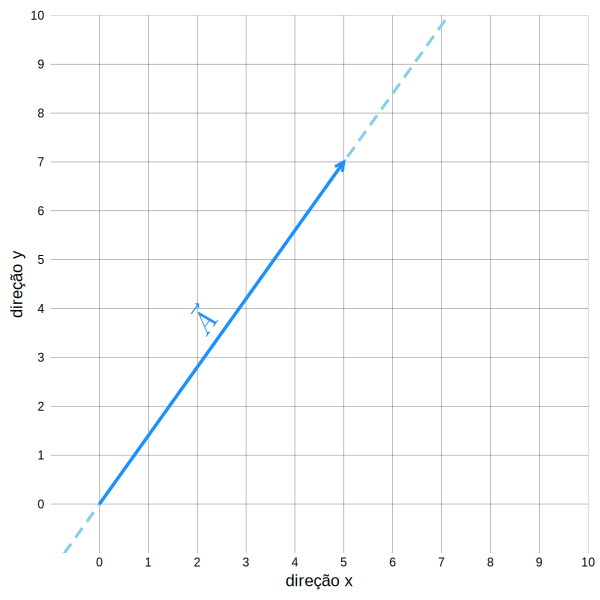

In [2]:
A = [5,7]

#função para encontrar as coordenadas do texto de identificação do vetor A.
#A identificação será colocada na posição média do vetor a uma altura igual a TextHeight.
#Para funcionar os eixos x e y tem que ter o mesmo tamanho!
function rotate_text(TextHeight::Float64, Vec::Vector{T}) where {T<:Real}
    modVec = hypot(Vec[1], Vec[2])
    Vec[1] >= 0 && (angVec = asind(Vec[2]/modVec))
    Vec[1] < 0 && (angVec = 180 - asind(Vec[2]/modVec))
    rotM = [cosd(angVec) sind(angVec)
           -sind(angVec) cosd(angVec)]
    TextPos = [modVec/2 TextHeight]
    return TextPos*rotM
end

    
default(grid = true, markersize = 8, framestyle = :grid, linewidth = 3, legend = :false, size = (600,600),
    aspect_ratio = :equal, gridalpha = 1)

#títulos dos eixos
xtitle = "direção x"
ytitle = "direção y"

#criando string de identificação do vetor A
idAstr = latexstring("\\vec{A}")

#calculando ângulo entre A e a direção x em graus
ang = atand(A[2]/A[1])

#calculando posição do texto de identificação do vetor A
idApos = rotate_text(0.5, A)

#criando anotação com a identificação de A
ann_id = [(idApos[1], idApos[2], text(idAstr, halign = :center, valign = :center, pointsize = 20, color = :dodgerblue, 
    rotation = ang))]

#desenhando imagem
plot([-2*A[1],4*A[1]],[-2*A[2],4*A[2]], linestyle = :dash, color = :skyblue, xaxis = (xtitle, (-1,10), 0:1:10),
    yaxis = (ytitle, (-1,10), 0:1:10), gridalpha = 0.5)
quiver!([0],[0], quiver = ([A[1]],[A[2]]), color = :dodgerblue)

#descomente a linha abaixo para mostrar as componentes do vetor A
#quiver!([0,A[1]],[0,0], quiver = ([A[1],0],[0,A[2]]), color = :red, ls = :dot, alpha = 0.5)

annotate!(ann_id)

O **comprimento** do segmento de reta representa o **módulo do vetor**. O comprimento é uma grandeza que tem sempre valor positivo! A **linha pontilhada** é a reta que representa a **direção do vetor**. Ao longo de uma determinada reta é possível seguir em dois sentidos diferentes. A **seta** na extremidade do vetor representa o **sentido do vetor**. A extremidade oposta à seta é chamada de **origem do vetor**.

O vetor $\vec{A}$ acima está no plano (duas dimensões), então, como visto anteriormente, são necessários dois valores para descrevê-lo matematicamente: 

$$\vec{A} = \left( a_x, a_y \right).$$

Essa notação diz que partindo da origem do vetor (extremidade sem a seta), deve-se andar $a_x$ na direção $x$, e $a_y$ na direção $y$ para se chegar até ao final do vetor (extremidade com a seta). $a_x$ é chamada de componente $x$ do vetor, e $a_y$ é a componente $y$ do mesmo vetor. As direções que definem as componentes de um vetor sempre são direções perpendiculares entre si.

O módulo de $\vec{A}$, ou seja, seu comprimento, é representado pela seguinte notação $||\vec{A}||$. Um vetor no plano, com 2 dimensões, escrito como uma componente $a_x$ na direção $x$ que é perpendicular a uma componente $a_y$ na direção $y$, tem seu módulo calculado utilizando o *Teorema de Pitágoras*:

$$||\vec{A}|| = \sqrt{a_{x}^2 + a_{y}^2}.$$

As componentes do vetor $\vec{A}$ na figura acima são:

In [3]:
#componentes do vetor A
Astr = @sprintf("\\left(%2.1f, %2.1f\\right)", A[1], A[2])
Astr = replace(Astr, "." => ",\\!")
vecA = latexstring("\\vec{A} = ", Astr)

vecA

L"$\vec{A} = \left(5,\!0, 7,\!0\right)$"

E o módulo de $\vec{A}$ é:

In [4]:
#módulo do vetor A
modAstr = @sprintf("||\\vec{A}|| = %3.1f", hypot(A[1],A[2]))
modAstr = replace(modAstr, "." => ",\\!")
modAtext = latexstring(modAstr)
modAtext

L"$||\vec{A}|| = 8,\!6$"

Para se representar um vetor no espaço 3-D é necessário uma componente a mais na direção $z$, ou seja, 3 componentes vetoriais:

$$\vec{A}_{3D} = (a_x, a_y, a_z).$$

Nesse caso, o módulo do vetor também é calculado utilizando-se do *Teorema de Pitágoras*:

$$||\vec{A}|| = \sqrt{a_{x}^2 + a_{y}^2 + a_{z}^2}.$$

Voltando ao caso de vetores no plano, vamos comparar o vetor $\vec{A}$ com um vetor $\vec{B}$ que está na figura abaixo.

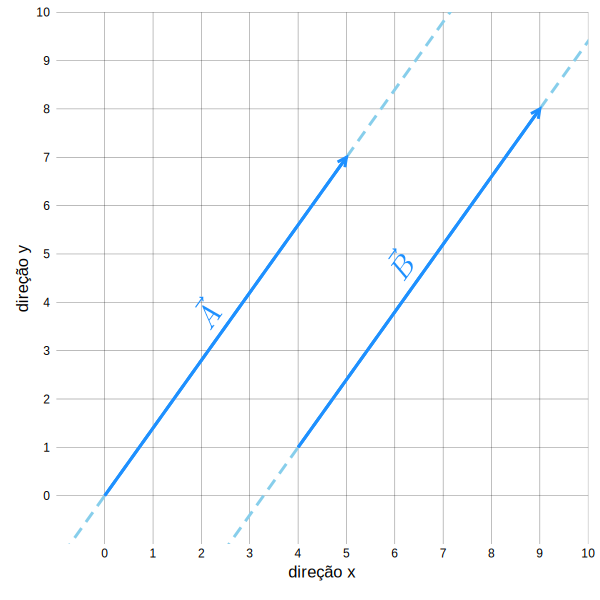

In [5]:
#criando um vetor B igual ao vetor A
B = copy(A)

#criando string de identificação do vetor B
idBstr = latexstring("\\vec{B}")

#criando anotações com as identificações de A e B
ann_id = [(idApos[1], idApos[2], text(idAstr, halign = :center, valign = :center, pointsize = 20, color = :dodgerblue, 
    rotation = ang)),
    (idApos[1] + 4, idApos[2] + 1, text(idBstr, halign = :center, valign = :center, pointsize = 20, color = :dodgerblue, 
    rotation = ang))]


#desenhando imagem
plot([-2*A[1],4*A[1]],[-2*A[2],4*A[2]], linestyle = :dash, color = :skyblue, xaxis = (xtitle, (-1,10), 0:1:10),
    yaxis = (ytitle, (-1,10), 0:1:10), gridalpha = 0.5)
plot!([-2*B[1]+4,4*B[1]+4],[-2*B[2]+1,4*B[2]+1], linestyle = :dash, color = :skyblue)
quiver!([0,4],[0,1], quiver = ([A[1],A[1]],[A[2],A[2]]), color = :dodgerblue)


annotate!(ann_id)

Podemos notar que as retas que definem as direções de $\vec{A}$ e de $\vec{B}$ são retas paralelas. Além disso, $\vec{A}$ e $\vec{B}$ têm o mesmo sentido - suas setas indicam o mesmo sentido sobre suas direções. Se além disso, os módulos de $\vec{A}$ e de $\vec{B}$ forem iguais, podemos dizer que ambos os vetores são iguais! 

As componentes de $\vec{B}$ são:

In [6]:
#componentes do vetor B
Bstr = @sprintf("\\left(%2.1f, %2.1f\\right)", B[1], B[2])
Bstr = replace(Bstr, "." => ",\\!")
vecB = latexstring("\\vec{B} = ", Bstr)

vecB

L"$\vec{B} = \left(5,\!0, 7,\!0\right)$"

$\vec{B}$ tem as mesmas componentes na direção $x$ e na direção $y$ que o vetor $\vec{A}$. Portanto, o módulo de $\vec{B}$ também é igual ao módulo de $\vec{A}$.

O módulo de $\vec{B}$ é:

In [7]:
#módulo do vetor B
modBstr = @sprintf("||\\vec{B}|| = %3.1f", hypot(B[1],B[2]))
modBstr = replace(modBstr, "." => ",\\!")
modB = latexstring(modBstr)
modB

L"$||\vec{B}|| = 8,\!6$"

Se $\vec{A}$ e $\vec{B}$ tem as mesmas componentes na direção $x$ e na direção $y$, ambos os vetores têm o mesmo módulo, a mesma direção e o mesmo sentido, e portanto são iguais.

$$\vec{A} = \vec{B}.$$

**Os vetores não precisam ter sua origem sobre o mesmo ponto para serem iguais, basta ter as mesmas componentes.**

O vetor que tem o mesmo módulo e mesma direção que $\vec{A}$, mas tem sentido ao de $\vec{A}$ é:  

$$-\vec{A}$$.

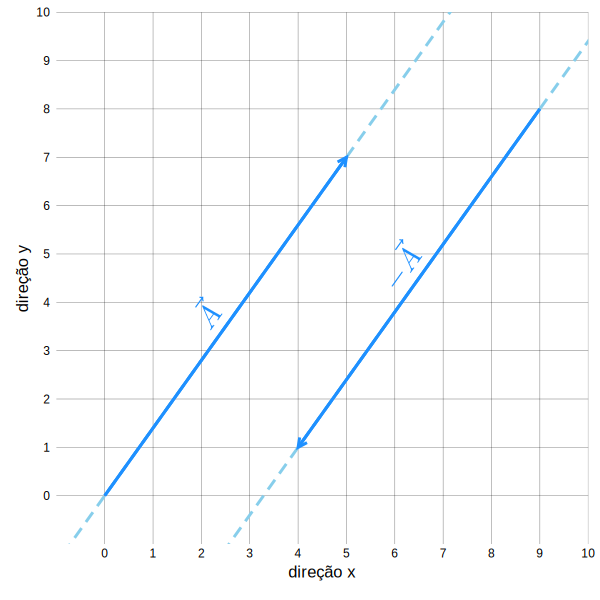

In [8]:
#criando string de identificação do vetor B
id_Astr = latexstring("-\\vec{A}")

#criando anotações com as identificações de A e B
ann_id = [(idApos[1], idApos[2], text(idAstr, halign = :center, valign = :center, pointsize = 20, color = :dodgerblue, 
    rotation = ang)),
    (idApos[1] + 4, idApos[2] + 1, text(id_Astr, halign = :center, valign = :center, pointsize = 20, color = :dodgerblue, 
    rotation = ang))]

#desenhando imagem
plot([-2*A[1],4*A[1]],[-2*A[2],4*A[2]], linestyle = :dash, color = :skyblue, xaxis = (xtitle, (-1,10), 0:1:10),
    yaxis = (ytitle, (-1,10), 0:1:10), gridalpha = 0.5)
plot!([-2*B[1]+4,4*B[1]+4],[-2*B[2]+1,4*B[2]+1], linestyle = :dash, color = :skyblue)
quiver!([0,9],[0,8], quiver = ([A[1],-A[1]],[A[2],-A[2]]), color = :dodgerblue)

#componentes de A e -A
#quiver!([9,9],[8,8-A[2]], quiver = ([0,-A[1]],[-A[2],0]), color = :red, ls = :dot, alpha = 0.5)
#quiver!([0,0],[0,A[2]], quiver = ([0,A[1]],[A[2],0]), color = :red, ls = :dot, alpha = 0.5)

annotate!(ann_id)

Todas as componentes de $-\vec{A}$ têm sinais contrários aos das componentes de $\vec{A}$:

$$ -\vec{A} = (-a_x, -a_y).$$

E seu módulo é:

$$||-\vec{A}|| = \sqrt{(-a_x)^2 + (-a_y)^2} = \sqrt{(a_x)^2 + (a_y)^2} = ||\vec{A}||$$

$$\Downarrow$$

$$||-\vec{A}|| = ||\vec{A}||.$$

In [9]:
#componentes do vetor -A
_Astr = @sprintf("\\left(%2.1f, %2.1f\\right)", -A[1], -A[2])
_Astr = replace(_Astr, "." => ",\\!")
_vecA = latexstring("-\\vec{A} = ", _Astr)

_vecA

L"$-\vec{A} = \left(-5,\!0, -7,\!0\right)$"

In [10]:
#módulo do vetor -A
mod_Astr = @sprintf("||-\\vec{A}|| = ||\\vec{A}|| = %3.1f", hypot(-A[1],-A[2]))
mod_Astr = replace(mod_Astr, "." => ",\\!")
mod_A = latexstring(mod_Astr)
mod_A

L"$||-\vec{A}|| = ||\vec{A}|| = 8,\!6$"

### **1.4.2 Soma de vetores**


Vamos considerar outros dois vetores diferentes: $\vec{C}$ e $\vec{D}$.

In [11]:
#gerando vetores aleatórios com componentes inteiras
C = rand((0:1:5), 2)
D = rand((-5:1:5), 2)

#calculando módulo dos vetores
modC = hypot(C[1],C[2])
modD = hypot(D[1],D[2])

#calculando os ângulos entre os vetores e a direção x
angC = atand(C[2]/C[1])
angD = atand(D[2]/D[1])

-75.96375653207353

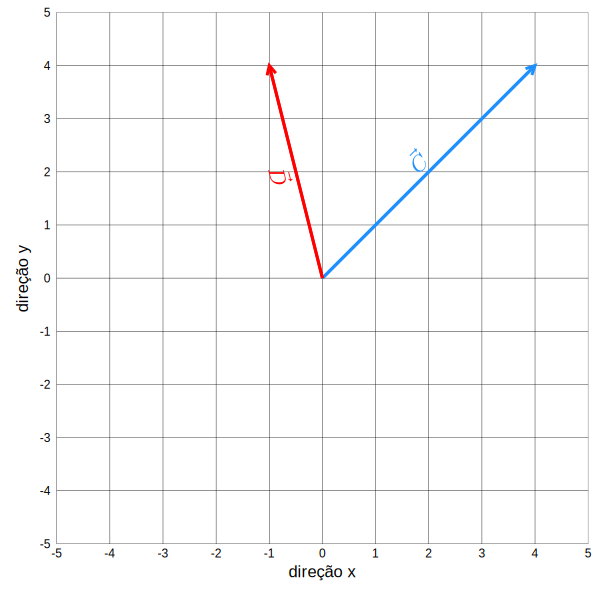

In [58]:
#calculando posição da id do vetor C
idCpos = rotate_text(0.30, C)

#calculando posição da id do vetor D
idDpos = rotate_text(0.30, D)

#calculando limites da imagem
xmax = max(C[1], D[1], 0)
ymax = max(C[2], D[2], 0)
xlimits = (xmax - 9, xmax + 1)
ylimits = (ymax - 9, ymax + 1)

#string de identificação dos vetores
idCstr = latexstring("\\vec{C}") 
idDstr = latexstring("\\vec{D}")

#definindo posição e texto das anotações
ann_id = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, 
            color = :dodgerblue, rotation = angC)),
    (idDpos[1], idDpos[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, 
            color = :red, rotation = angD))]

#desenhando imagem dos vetores
plot([],[],linestyle = :dash, color = :skyblue, xaxis = (xtitle, xlimits, xlimits[1]:1:xlimits[2]),
    yaxis = (ytitle, ylimits, ylimits[1]:1:ylimits[2]), framestyle = :grid, size = (600,600), 
    gridalpha = 0.8)
quiver!([0],[0], quiver = ([C[1]],[C[2]]), color = :dodgerblue)
quiver!([0],[0], quiver = ([D[1]],[D[2]]), color = :red)
annotate!(ann_id)


Para entender como se realiza a adição de vetores, vamos realizar a soma $\vec{C} + \vec{D}$. Inicialmente, vamos realizar esta soma graficamente, e para isso devemos: 
 
 * Desenhar o vetor $\vec{C}$;

 * desenhar o vetor $\vec{D}$ com sua origem começando na extremidade com a seta de $\vec{C}$.


┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
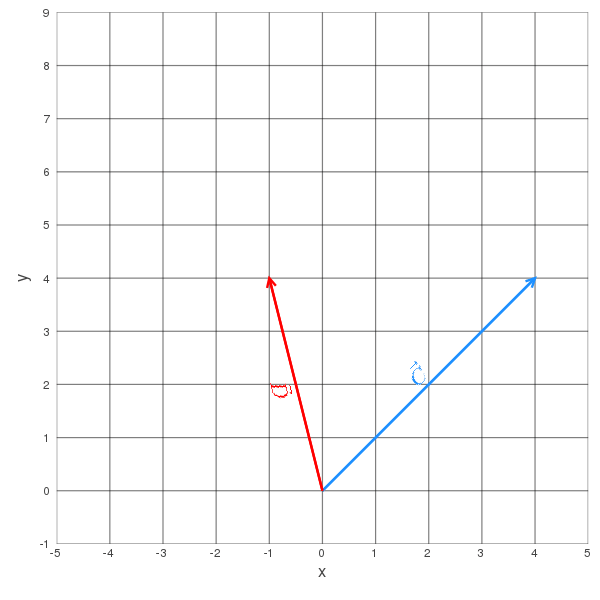

In [59]:
#definindo número de pontos para criar vetores de posição para a animação
npoints = 30

#definindo trajetória da origem do vetor C
#origemCx = vcat(range(-4, 0, length = npoints), zeros(npoints))
#origemCy = vcat(range(-2, 0, length = npoints), zeros(npoints))

#definindo trajetória da origem do vetor D
origemDx = vcat(range(0,C[1], length = npoints), C[1].+zeros(npoints))
origemDy = vcat(range(0,C[2], length = npoints), C[2].+zeros(npoints))

#definindo limites da imagem
xmax = max(C[1]+D[1],C[1],D[1],0)
ymax = max(C[2]+D[2],C[2],D[2],0)
xlimits = (xmax - 9, xmax + 1)
ylimits = (ymax - 9, ymax + 1)

#gerando animação
@gif for i = 1: 2*npoints
    
    ann_idani = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
                rotation = angC)),
        (idDpos[1] + origemDx[i], idDpos[2] + origemDy[i], text(idDstr, halign = :center, valign = :center, 
                pointsize = 15, color = :red, rotation = angD))]
    
    quiver([0],[0], quiver = ([C[1]],[C[2]]), color = :dodgerblue, lw = 2,
        framestyle = :grid, xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), 
        yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), gridalpha = 0.5)
    quiver!([origemDx[i]],[origemDy[i]], quiver = ([D[1]],[D[2]]), lw = 2, color = :red)
    annotate!(ann_idani)
end

O resultado da soma $\vec{C} + \vec{D}$, é chamado de **resultante**, e é o vetor que sai da origem de $\vec{C}$ e chega a extremidade final (seta) de $\vec{D}$.

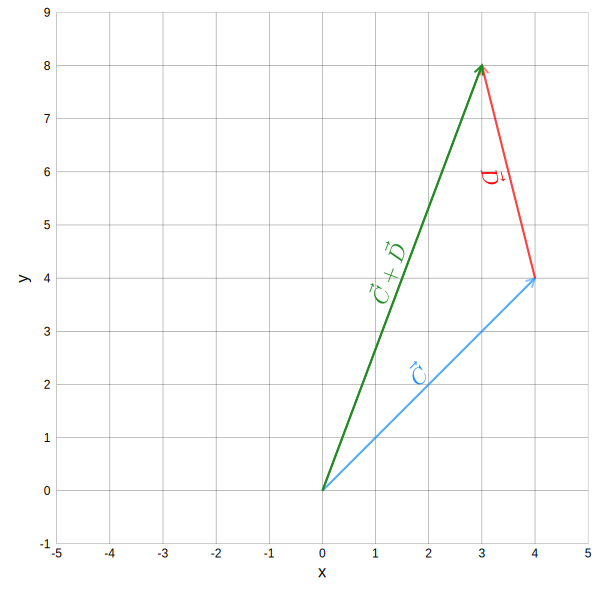

In [67]:
#criando strings em latex identificando a soma dos vetores
somastr = latexstring("\\vec{C} + \\vec{D}")
somastr2 = latexstring("\\vec{D} + \\vec{C}")

#calculando a posição relativa do texto de identificação
idSomapos = rotate_text(0.3, C+D)
idSomapos2 = rotate_text(-0.3, C+D)

#calculando ângulo que a resultante faz com a direção horizontal
angsoma = atand((C[2]+D[2])/(C[1]+D[1]))

#gerando anotações para serem inseridas na imagem
ann_id = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (idDpos[1] + C[1], idDpos[2] + C[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (idSomapos[1], idSomapos[2], text(somastr, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsoma))]

#desenhando vetores
quiver([0],[0],quiver = ([C[1]],[C[2]]), color = :dodgerblue, alpha = 0.5, framestyle = :grid, lw = 2,
    xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), 
    yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), size = (600,600), gridalpha = 0.5)
quiver!([C[1]],[C[2]],quiver = ([D[1]],[D[2]]), lw = 2, color = :red, alpha = 0.5)

#resultante de C+D
quiver!([0],[0], quiver = ([C[1]+D[1]],[C[2]+D[2]]), lw = 2, color = :forestgreen)

#componentes dos vetores C e D
#quiver!([0,C[1]+D[1]],[0,0], quiver = ([C[1],0],[0,C[2]]), color = :dodgerblue, alpha = 0.5, ls = :dot)
#quiver!([C[1],(C[1]+D[1])],[0,C[2]], quiver = ([D[1],0],[0,D[2]]), color = :red, alpha = 0.5, ls = :dot)

#criando anotações na imagem
annotate!(ann_id)

O vetor de cor verde representa a resultante $\vec{C} + \vec{D}$. Vamos dizer que $\vec{E} = \vec{C} + \vec{D}$. As linhas pontilhadas azuis representam as componentes de $\vec{C}$: $c_x$ na direção $x$ e $c_y$ na direção $y$. Já as linhas pontilhadas vermelhas representam as componentes de $\vec{D}$: $d_x$ na direção $x$ e $d_y$ na direção $y$.

Pela própria figura acima, podemos perceber que as componentes de $\vec{E}$ são: $c_x + d_x$ na direção $x$, e $c_y + d_y$ na direção $y$.

$$\vec{E} = \vec{C} + \vec{D} = (c_x + d_x, c_y + d_y).$$

In [61]:
#representação do vetor C e de seu módulo
Cstr = @sprintf("\\left(%2.1f, %2.1f\\right)", C[1], C[2])
Cstr = replace(Cstr, "." => ",\\!")
modCstr = @sprintf("%2.1f", modC)
modCstr = replace(modCstr, "." => ",\\!")
latexstring("\\vec{C} = ", Cstr, "\\Rightarrow ||\\vec{C}|| = ", modCstr)

L"$\vec{C} = \left(4,\!0, 4,\!0\right)\Rightarrow ||\vec{C}|| = 5,\!7$"

In [62]:
#representação do vetor D e de seu módulo
Dstr = @sprintf("\\left(%2.1f, %2.1f\\right)", D[1], D[2])
Dstr = replace(Dstr, "." => ",\\!")
modDstr = @sprintf("%2.1f", modD)
modDstr = replace(modDstr, "." => ",\\!")
latexstring("\\vec{D} = ", Dstr, "\\Rightarrow ||\\vec{D}|| = ", modDstr)

L"$\vec{D} = \left(-1,\!0, 4,\!0\right)\Rightarrow ||\vec{D}|| = 4,\!1$"

In [63]:
#resultante de C+D e o módulo da resultante
E = C + D
modE = hypot(E[1],E[2])
Estr = @sprintf("\\left(%2.1f, %2.1f\\right)", E[1], E[2])
Estr = replace(Estr, "." => ",\\!")
modEstr = @sprintf("%2.1f", modE)
modEstr = replace(modEstr, "." => ",\\!")
latexstring("\\vec{E} = \\vec{C} + \\vec{D} = ", Estr, "\\Rightarrow ||\\vec{E}|| = ", modEstr)

L"$\vec{E} = \vec{C} + \vec{D} = \left(3,\!0, 8,\!0\right)\Rightarrow ||\vec{E}|| = 8,\!5$"

Podemos notar que no caso acima: $||\vec{C} + \vec{D}|| \neq ||\vec{C}|| + ||\vec{D}||$. 

Só existe uma situação em que $||\vec{C} + \vec{D}|| = ||\vec{C}|| + ||\vec{D}||$, que ocorre quando os vetores $\vec{C}$ e $\vec{D}$ têm a mesma direção e mesmo sentido. 

Em qualquer outra situação $||\vec{C} + \vec{D}|| < ||\vec{C}|| + ||\vec{D}||$.

Isso quer dizer que o comprimento do vetor resultante **sempre** será menor ou igual à soma dos comprimentos de cada um dos vetores sendo somados.

$$||\vec{C} + \vec{D}|| \leq  ||\vec{C}|| + ||\vec{D}||.$$

Vamos somar agora $\vec{D} + \vec{C}$, e comparar com $\vec{C} + \vec{D}$.

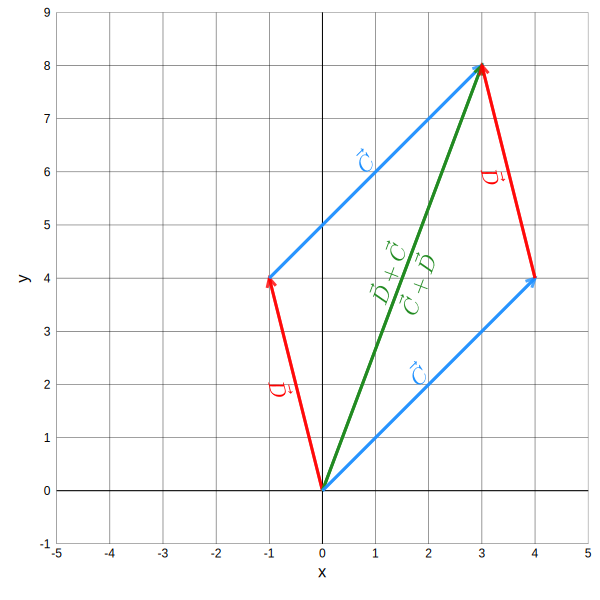

In [69]:
#criando imagem ilustrando a Regra do Paralelogramo e mostrando C+D = D+C.

#anotações que serão inseridas na imagem
ann_id = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (idDpos[1] + C[1], idDpos[2] + C[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (idDpos[1], idDpos[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (idCpos[1] + D[1], idCpos[2] + D[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (idSomapos[1], idSomapos[2], text(somastr2, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsoma)),
    (idSomapos2[1], idSomapos2[2], text(somastr, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsoma))]

#desenhando vetores
quiver([0],[0],  quiver = ([D[1]],[D[2]]), color = :red, framestyle = :zerolines,
    xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), alpha = 0.8,
    yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), size = (600,600), gridalpha = 0.8)

quiver!([D[1]],[D[2]], quiver = ([C[1]],[C[2]]), color = :dodgerblue, alpha = 0.8)

quiver!([0],[0], quiver = ([E[1]],[E[2]]), color = :forestgreen)

quiver!([0],[0],  quiver = ([C[1]],[C[2]]), color = :dodgerblue, alpha = 0.8)
quiver!([C[1]],[C[2]],  quiver = ([D[1]],[D[2]]), color = :red, alpha = 0.8)

annotate!(ann_id)

Ao representarmos graficamente a soma dos dois vetores, das duas maneiras diferentes, formamos a figura de um paralelogramo. Os dois vetores em azul são iguais ao vetor $\vec{C}$, e portanto são paralelos; e os dois vetores vermelhos que são iguais a $\vec{D}$ e, portanto, também são paralelos. A resultante dos vetores - vetor verde - pode ser facilmente encontrado utilizando o paralelogramo formado acima, e é a diagonal que sai do ponto de origem, comum aos vetores $\vec{C}$ e $\vec{D}$, e termina no ponto de encontro das setas dos vetores $\vec{D}$ e $\vec{C}$. Essa regra é conhecida como *Regra do Paralelogramo*.

Podemos ver que a ordem em que os vetores são somados não interfere no resultado final. **A soma vetorial é comutativa!**

**E a subtração?**

A subtração $\vec{C} - \vec{D}$, nada mais é do que $\vec{C} + (-\vec{D})$. Ao invés de se somar o vetor $\vec{D}$, deve-se somar o vetor $-\vec{D}$, um vetor com mesmo módulo e direção, mas com sentido oposto ao de $\vec{D}$, como já visto.

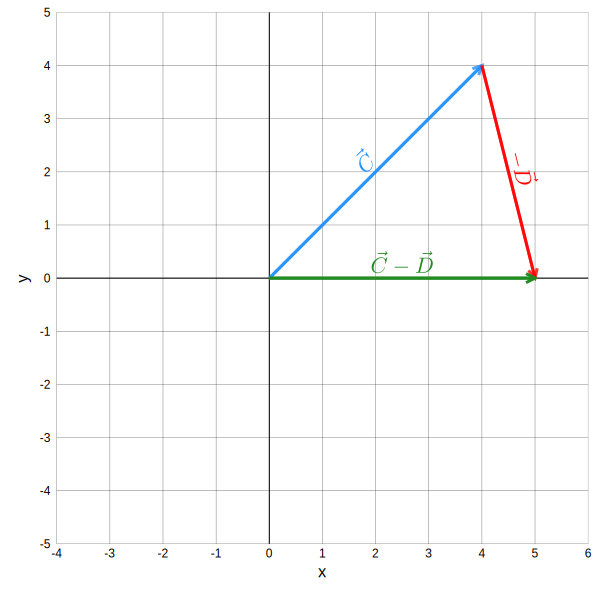

In [70]:
#calculando C-D
sub_cd = C - D

#criando strings de identificação
sub_cd_str = latexstring("\\vec{C} - \\vec{D}")
id_Dstr = latexstring("-\\vec{D}")

#calculando posições relativas das strings de identificação na imagem
id_Dpos = rotate_text(0.3, -D)
idsub_cd_pos = rotate_text(0.3, sub_cd)

#calculando ângulo entre o vetor C-D e a direção horizontal
angsubcd = atand(sub_cd[2]/sub_cd[1])

#gerando anotações
ann_id = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (id_Dpos[1] + C[1], id_Dpos[2] + C[2], text(id_Dstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (idsub_cd_pos[1], idsub_cd_pos[2], text(sub_cd_str, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsubcd))]


#definindo limites da imagem
xmax = max(C[1]-D[1],C[1],-D[1],0)
ymax = max(C[2]-D[2],C[2],-D[2],0)
xlimits = (xmax - 9, xmax + 1)
ylimits = (ymax - 9, ymax + 1)

#desenhando vetores
quiver([0],[0],  quiver = ([C[1]],[C[2]]), color = :dodgerblue, framestyle = :zerolines,
    xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), alpha = 0.8,
    yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), size = (600,600), gridalpha = 0.5)

quiver!([C[1]],[C[2]], quiver = ([-D[1]],[-D[2]]), color = :red, alpha = 0.8)

quiver!([0],[0], quiver = ([sub_cd[1]],[sub_cd[2]]), color = :forestgreen)

annotate!(ann_id)

In [20]:
#Resultante e módulo de C-D
modc_d = hypot(sub_cd[1],sub_cd[2])
subcdstr = @sprintf("\\left(%2.1f, %2.1f\\right)", sub_cd[1], sub_cd[2])
subcdstr = replace(subcdstr, "." => ",\\!")
modc_dstr = @sprintf("%2.1f", modc_d)
modc_dstr = replace(modc_dstr, "." => ",\\!")
latexstring("\\vec{C} - \\vec{D} = ", subcdstr, "\\Rightarrow ||\\vec{C} - \\vec{D}|| = ", modc_dstr)

L"$\vec{C} - \vec{D} = \left(5,\!0, 0,\!0\right)\Rightarrow ||\vec{C} - \vec{D}|| = 5,\!0$"

Vamos comparar $\vec{C} - \vec{D}$ com $\vec{D} - \vec{C}$.

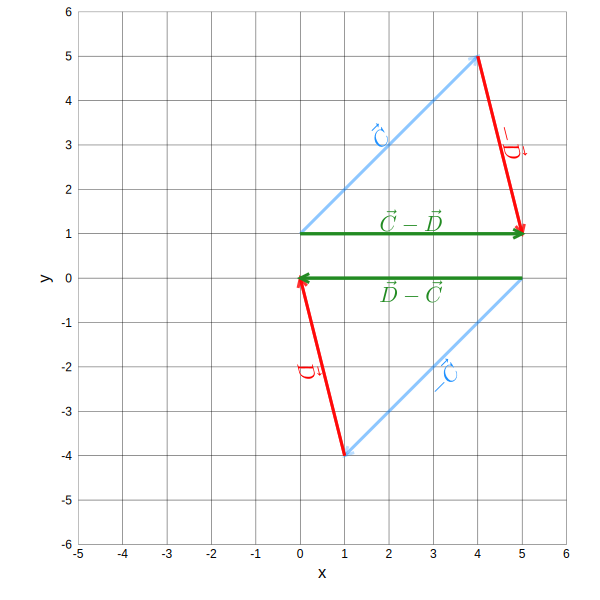

In [71]:
#calculando D-C
sub_dc = D - C

#gerando strings de identificação
sub_dc_str = latexstring("\\vec{D} - \\vec{C}")
id_Cstr = latexstring("-\\vec{C}")

#calculando posições relativas das strings de identificação
id_Cpos = rotate_text(0.3, -C)
idsub_dc_pos = rotate_text(0.3, sub_dc)

#calculando ângulo entre D-C é a direção horizontal
angsubdc = atand(sub_dc[2]/sub_dc[1])

#gerando anotações da imagem
ann_id = [(idCpos[1], idCpos[2] + 1, text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (id_Dpos[1] + C[1], id_Dpos[2] + C[2] + 1, text(id_Dstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (idsub_cd_pos[1], idsub_cd_pos[2] + 1, text(sub_cd_str, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsubcd)),
    (idDpos[1] - D[1], idDpos[2] - D[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, color = :red,
    rotation = angD)),
    (id_Cpos[1] + sub_cd[1], id_Cpos[2] + sub_cd[2], text(id_Cstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (idsub_dc_pos[1] + sub_cd[1], idsub_dc_pos[2] + sub_cd[2], text(sub_dc_str, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsubcd))]

#definindo limites da imagem
xmax = max(C[1]-D[1],C[1],-D[1],D[1]-C[1],-C[1],D[1],0)
ymax = max(C[2]-D[2],C[2],-D[2],D[2]-C[2],-C[2],D[2],0)
xlimits = (xmax - 10, xmax + 1)
ylimits = (ymax - 10, ymax + 2)

#desenhando vetores
quiver([0,sub_cd[1]],[1,sub_cd[2]],  quiver = ([C[1],-C[1]],[C[2],-C[2]]), color = :dodgerblue, framestyle = :grid,
    xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), alpha = 0.3,
    yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), size = (600,600), gridalpha = 0.8)

quiver!([C[1],-D[1]],[C[2]+1,-D[2]], quiver = ([-D[1],D[1]],[-D[2],D[2]]), color = :red, alpha = 0.8)

quiver!([0,sub_cd[1]],[1,sub_cd[2]], quiver = ([sub_cd[1],sub_dc[1]],[sub_cd[2], sub_dc[2]]), color = :forestgreen)

annotate!(ann_id)

In [44]:
#Resultante e módulo de D-C
modd_c = hypot(sub_dc[1],sub_dc[2])
subdcstr = @sprintf("\\left(%2.1f, %2.1f\\right)", sub_dc[1], sub_dc[2])
subdcstr = replace(subdcstr, "." => ",\\!")
modd_cstr = @sprintf("%2.1f", modd_c)
modd_cstr = replace(modd_cstr, "." => ",\\!")
latexstring("\\vec{D} - \\vec{C} = ", subdcstr, "\\Rightarrow ||\\vec{D}-\\vec{C}|| = ", modd_cstr)

L"$\vec{D} - \vec{C} = \left(-5,\!0, 0,\!0\right)\Rightarrow ||\vec{D}-\vec{C}|| = 5,\!0$"

Como esperado:

$$\vec{C} - \vec{D} = -(\vec{D} - \vec{C}).$$

Se colocarmos $\vec{C}$ e $\vec{D}$ com a mesma origem, o vetor que sai da extremidade de $\vec{C}$ e chega à extremidade de $\vec{D}$ é o resultado de $\vec{D} - \vec{C}$. E o vetor contrário, que sai da extremidade de $\vec{D}$ e chega à extremidade de $\vec{C}$, é o resultado de $\vec{C} - \vec{D}$.

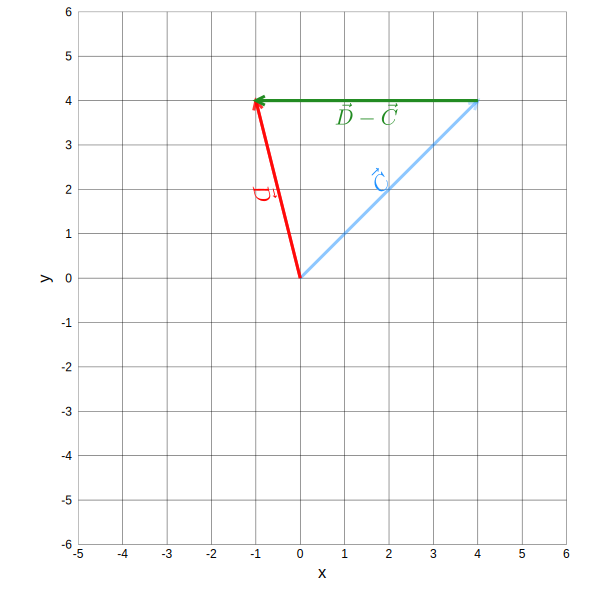

In [51]:
#imagem que mostra como obter D-C ou C-D a partir dos vetores C e D

#gerando anotações
ann_id = [(idCpos[1], idCpos[2], text(idCstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = angC)),
    (idDpos[1], idDpos[2], text(idDstr, halign = :center, valign = :center, pointsize = 15, color = :red, 
    rotation = angD)),
    (C[1] + idsub_dc_pos[1], C[2] + idsub_dc_pos[2], text(sub_dc_str, halign = :center, valign = :center, pointsize = 15, color = :forestgreen,
    rotation = angsubcd))]

#desenhando vetores
quiver([0],[0],  quiver = ([C[1]],[C[2]]), color = :dodgerblue, framestyle = :grid,
    xaxis = ("x", xlimits, xlimits[1]:1:xlimits[2]), alpha = 0.3,
    yaxis = ("y", ylimits, ylimits[1]:1:ylimits[2]), size = (600,600), gridalpha = 0.8)

quiver!([0],[0], quiver = ([D[1]],[D[2]]), color = :red, alpha = 0.8)

quiver!([C[1]],[C[2]], quiver = ([sub_dc[1]],[sub_dc[2]]), color = :forestgreen)
    
annotate!(ann_id)


Para se somar três ou mais vetores, o método é o mesmo. 

In [23]:
#definindo número de vetores a serem somados
nvec = 5

#criando nvec vetores aleatórios
vecs = rand(-5:1:5, (nvec,2))

#resultante dos nvec vetores
res = [sum(vecs[:,1]), sum(vecs[:,2])]

#calculando ângulo que a resultante faz com a direção x
ang_res = atand(res[2]/res[1])

#string em latex com os valores de cada vetor.
vecstr = ""
for i = 1:nvec
    vecstr = string(vecstr, string("\\vec{a}_{", i,"} = (", vecs[i,1], ",", vecs[i,2], ")\\, \\newline"))
end

latexstring(vecstr)

L"$\vec{a}_{1} = (-4,-5)\, \newline\vec{a}_{2} = (-4,-1)\, \newline\vec{a}_{3} = (-2,5)\, \newline\vec{a}_{4} = (-2,1)\, \newline\vec{a}_{5} = (-5,1)\, \newline$"

Antes de somar os vetores acima, vamos representá-los graficamente.

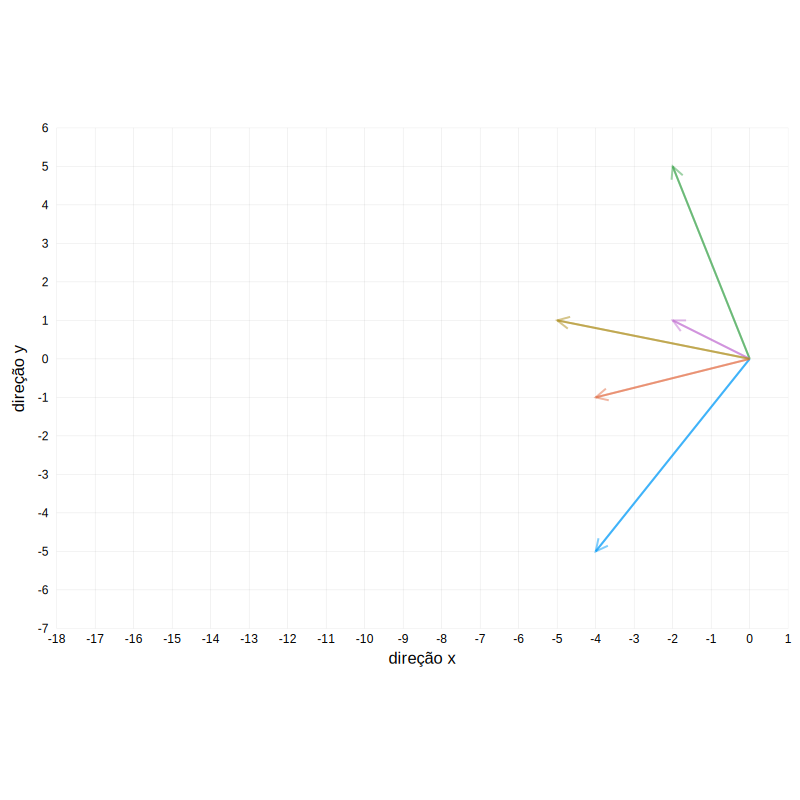

In [24]:
#calculando limites na direção x e na direção y para a criação da imagem
xmax = max(vecs[1,1],0)
ymax = max(vecs[1,2],0)

xmin = min(vecs[1,1],0)
ymin = min(vecs[1,2],0)

#gerando vetor com os pontos de origem de cada um dos vetores que serão somados
origins = [0 0]

#calculando limites e origem dos vetores
for i = 2: nvec
    origins = vcat(origins, [(origins[i-1,1] + vecs[i-1,1]) (origins[i-1,2] + vecs[i-1,2])])
    xmax = max(xmax, origins[i,1], vecs[i,1])
    ymax = max(ymax, origins[i,2], vecs[i,2])
    xmin = min(xmin, origins[i,1], vecs[i,1])
    ymin = min(ymin, origins[i,2], vecs[i,2])
end

xmax = max(xmax, res[1])
xmin = min(xmin, res[1])

ymax = max(ymax, res[2])
ymin = min(ymin, res[2])

xlimits = (xmin - 1, xmax + 1)
ylimits = (ymin - 1, ymax + 1)

#gerando texto que será inserido na imagem
res_pos = rotate_text(0.35, res)

resstr = latexstring("{\\rm Resultante:\\;} \\vec{S}  = (", res[1],",", res[2],").")

ann_res = [(res_pos[1,1], res_pos[1,2], text(resstr, halign = :center, valign = :center, pointsize = 12, rotation = ang_res))]

#gerando imagem
plt1 = quiver([0],[0], quiver = ([vecs[1,1]],[vecs[1,2]]), lw = 2, alpha = 0.5, framestyle = :grid,
        xaxis = ("direção x", xlimits, xlimits[1]:1:xlimits[2]),
        yaxis = ("direção y", ylimits, ylimits[1]:1:ylimits[2]), size = (800, 800))

for i = 2: nvec
#    quiver!([origins[i,1]],[origins[i,2]], quiver = ([vecs[i,1]],[vecs[i,2]]), lw = 2, alpha = 0.5)
    quiver!([0],[0], quiver = ([vecs[i,1]],[vecs[i,2]]), lw = 2, alpha = 0.5)
end

#quiver!([0],[0], quiver = ([res[1]], [res[2]]), lw = 4, ann = ann_res)
plt1

Para somá-los, devemos desenhar os vetores em sequência, com suas origens coincidindo com a extremidade do vetor anterior. A resultante é o vetor que sai da origem do primeiro vetor, e chega à extremidade do último vetor.

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
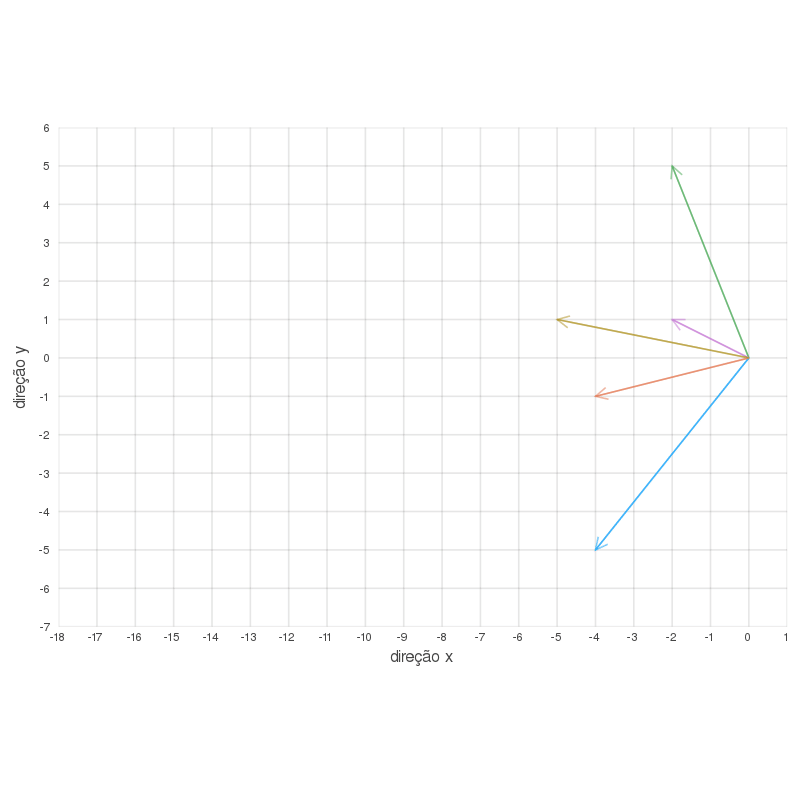

In [25]:
#criando animação mostrando a soma de N vetores

#número de pontos utilizados durante o movimento dos vetores
npoints = 30

#gerando vetor com a posição da origem de a2 em função do tempo t
a2_ani_x = vcat(range(0,origins[2,1], length = npoints), origins[2,1].+zeros(nvec*npoints))
a2_ani_y = vcat(range(0,origins[2,2], length = npoints), origins[2,2].+zeros(nvec*npoints))

origens_ani = [[a2_ani_x, a2_ani_y]]

#criando o movimento do vetor resultante
line_somax = vcat(zeros((nvec-1)*npoints), range(0, res[1], length = npoints), res[1].+zeros(npoints))
line_somay = vcat(zeros((nvec-1)*npoints), range(0, res[2], length = npoints), res[2].+zeros(npoints))

#gerando vetores com a posição da origem de a3 a aN
for i = 3: nvec
    ai_ani_x = vcat(zeros((i-2)*npoints), range(0,origins[i,1], length = npoints), origins[i,1].+zeros((nvec+2-i)*npoints))
    ai_ani_y = vcat(zeros((i-2)*npoints), range(0,origins[i,2], length = npoints), origins[i,2].+zeros((nvec+2-i)*npoints))
    push!(origens_ani, [ai_ani_x, ai_ani_y])
end

#anotação com a resultante da soma
ann_res = [(res_pos[1,1], res_pos[1,2], text(resstr, halign = :center, valign = :center, pointsize = 12, rotation = ang_res))]

#gerando animação
@gif for i = 1: (nvec+1)*npoints
    quiver([0],[0], quiver = ([vecs[1,1]],[vecs[1,2]]), lw = 2, alpha = 0.5, framestyle = :grid,
        xaxis = ("direção x", xlimits, xlimits[1]:1:xlimits[2]),
        yaxis = ("direção y", ylimits, ylimits[1]:1:ylimits[2]), size = (800,800))
     for j = 2:nvec
        quiver!([origens_ani[j-1][1][i]],[origens_ani[j-1][2][i]], quiver = ([vecs[j,1]],[vecs[j,2]]), 
            lw = 2, alpha = 0.5)
     end
     quiver!([0],[0], quiver = ([line_somax[i]],[line_somay[i]]), lw = 4)
     
     if i > nvec*30
        annotate!(ann_res)
     end
end
    

Matematicamente, a componente na direção $x$ do vetor resultante $\vec{S}$ é igual à soma das componentes na direção $x$ de todos os vetores que estão sendo somados, e a componente na direção $y$ do vetor resultante é igual à soma das componentes $y$ de todos os vetores sendo somados.

$$\vec{S} = (a_{1x} + a_{2x} + a_{3x} + ... + a_{Nx}, a_{1y} + a_{2y} + a_{3y} + ... + a_{Ny}) $$

In [52]:
#vetor resultante S
resstr = "\\vec{S} = ("
for i = 1: nvec
    if i ≠ nvec
        resstr = string(resstr, "\\vec{a}_{", i, "} + ")
    else
        resstr = string(resstr, "\\vec{a}_{", i, "}) = ")
    end
end

resvecstr = @sprintf("(%2i, %2i)", res[1], res[2])
restxt = latexstring(resstr, resvecstr)
restxt = replace(restxt, "." => ",\\!")
latexstring(restxt)

L"$\vec{S} = (\vec{a}_{1} + \vec{a}_{2} + \vec{a}_{3} + \vec{a}_{4} + \vec{a}_{5}) = (-17,  1)$"

In [55]:
#módulo do vetor resultante
modS = hypot(res[1],res[2])
modSstr = @sprintf("||\\vec{S}|| = %4.2f", modS)
modSstr = replace(modSstr, "." => ",\\!")
latexstring(modSstr)

L"$||\vec{S}|| = 17,\!03$"

In [72]:
#soma dos módulos dos vetores sendo somados
modsoma = 0
somastr = ""
for i = 1: nvec
    modsoma += hypot(vecs[i,1],vecs[i,2])
    if i ≠ nvec
        somastr = string(somastr, "||\\vec{a}_{", i, "}|| + ")
    else
        somastr = string(somastr, "||\\vec{a}_{", i, "}|| = ")
    end
end

modsomastr = @sprintf("%4.2f", modsoma)
somatxt = latexstring(somastr, modsomastr)
somatxt = replace(somatxt, "." => ",\\!")
latexstring(somatxt)

L"$||\vec{a}_{1}|| + ||\vec{a}_{2}|| + ||\vec{a}_{3}|| + ||\vec{a}_{4}|| + ||\vec{a}_{5}|| = 23,\!25$"

Novamente vimos que o módulo do vetor resultante é menor que a soma dos módulos de suas componentes. O vetor resultante sempre terá seu módulo menor ou igual à soma dos módulos de suas componentes. 

$$\left|\left|\sum_{n = 1}^{N} (\vec{a}_{n})\right|\right| \leq \sum_{n=1}^{N} ||\vec{a}_{n}||.$$

**Obs: A única situação em que o módulo do vetor resultante é igual à soma dos módulos de suas componentes é quando todas as componentes têm a mesma direção e o mesmo sentido!**